In [24]:
import pickle
import networkx as nx
from node2vec import Node2Vec
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import random
import math
from networkx import to_numpy_matrix

In [25]:
EMBEDDING_FILENAME = './embeddings.emb'
EMBEDDING_MODEL_FILENAME = './embeddings.model'

In [26]:
# functions

#display graph
def display_graph(G):
    plt.figure(figsize=(12,12))
    nx.draw(G, node_size=80, node_color='yellow', with_labels=True, nodetype = int)
    return

# node2vec for each node
def create_n2v_dict(G):
    # get node to vec embeddings
    node2vec = Node2Vec(G, dimensions=50, walk_length=5, num_walks=5, workers=4)  
    model = node2vec.fit(window=10, min_count=1, batch_words=4)  
    model.wv.save_word2vec_format(EMBEDDING_FILENAME)
    model.save(EMBEDDING_MODEL_FILENAME)
    emb = pd.read_csv(EMBEDDING_FILENAME, "r")
    
    n2v = dict()
    for i in range(len(emb)):
        tmp = list(emb.iloc[i])[0].split(" ")
        n2v[tmp[0]] = list(map(float, tmp[1:]))
    return n2v


In [27]:
#Extracting dataframes

feat_names = pd.read_csv("facebook/0.featnames")
edges = pd.read_csv("facebook/0.edges")
feat = pd.read_csv("facebook/0.feat")
circles = pd.read_csv("facebook/0.circles")

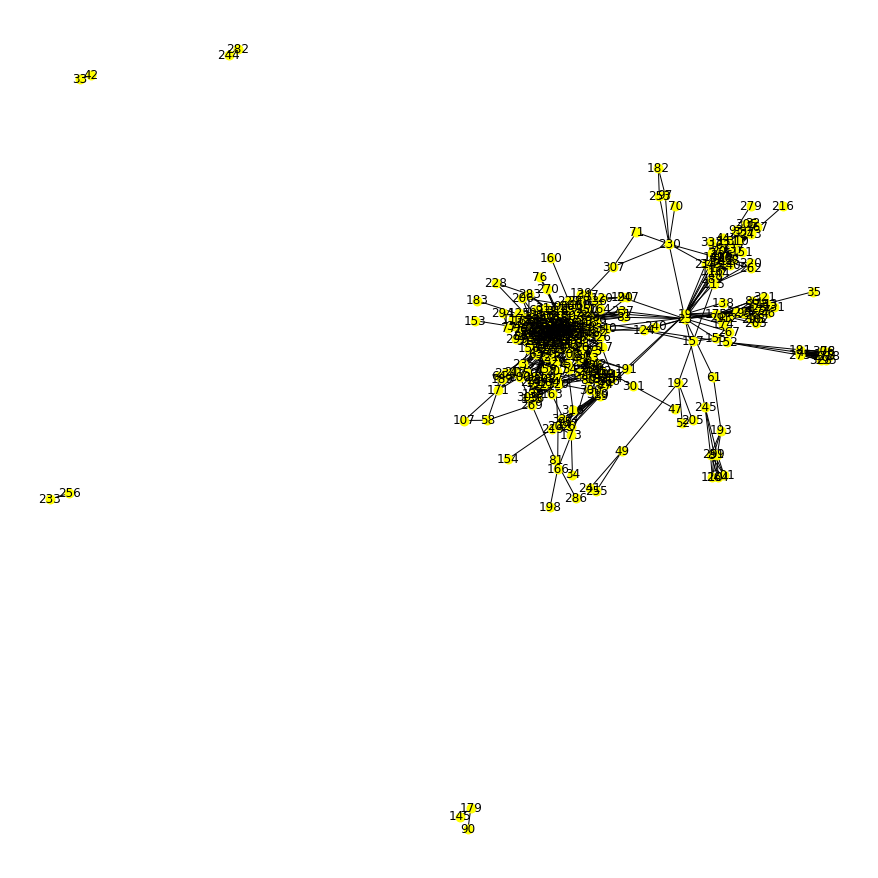

In [28]:
# building the graph

#edgelist is needed for read_edgelist
edge_df = open("facebook/0.edges", "rb")
G = nx.read_edgelist(edge_df)
display_graph(G)
        

In [31]:
#Building edge_dic

# getting nodes and edges for dataframe from graph
print(len(G.nodes))
print(len(G.edges))

node_list = list(np.unique(G.nodes))
edge_list = list(G.edges)


entries = []

# all_edges dictionary
edge_dict = dict()


for node1 in node_list:
    for node2 in node_list:
        if node1 != node2 and (node1, node2) not in edge_dict and (node2, node1) not in edge_dict:
            if (node1, node2) in edge_list or (node2, node1) in edge_list:
                edge_dict[(node1, node2)] = 1
            else:
                edge_dict[(node1, node2)] = 0
                
print(len(edge_list))
print(len(edge_dict))                


333
2519
2519
55278


In [30]:
n2v = create_n2v_dict(G)

Computing transition probabilities:   3%|▎         | 10/333 [00:00<00:03, 97.67it/s]

{('1', '10'): 0, ('1', '100'): 0, ('1', '101'): 0, ('1', '102'): 0, ('1', '103'): 0, ('1', '104'): 0, ('1', '105'): 0, ('1', '106'): 0, ('1', '107'): 0, ('1', '108'): 0, ('1', '109'): 0, ('1', '110'): 0, ('1', '111'): 0, ('1', '112'): 0, ('1', '113'): 0, ('1', '115'): 0, ('1', '116'): 0, ('1', '117'): 0, ('1', '118'): 0, ('1', '119'): 1, ('1', '120'): 0, ('1', '121'): 0, ('1', '122'): 0, ('1', '123'): 0, ('1', '124'): 0, ('1', '125'): 0, ('1', '126'): 1, ('1', '127'): 0, ('1', '128'): 0, ('1', '129'): 0, ('1', '13'): 0, ('1', '130'): 0, ('1', '131'): 0, ('1', '132'): 0, ('1', '133'): 1, ('1', '134'): 0, ('1', '135'): 0, ('1', '136'): 0, ('1', '137'): 0, ('1', '138'): 0, ('1', '139'): 0, ('1', '14'): 0, ('1', '140'): 0, ('1', '141'): 0, ('1', '142'): 0, ('1', '143'): 0, ('1', '144'): 0, ('1', '145'): 0, ('1', '146'): 0, ('1', '147'): 0, ('1', '148'): 0, ('1', '149'): 0, ('1', '150'): 0, ('1', '151'): 0, ('1', '152'): 0, ('1', '153'): 0, ('1', '154'): 0, ('1', '155'): 0, ('1', '156'): 0,

Computing transition probabilities: 100%|██████████| 333/333 [00:01<00:00, 286.71it/s]


{'25': [-0.03391474, -0.0090045305, 0.051557846, -0.041089714, -0.0335749, -0.038559325, -0.016491696, -0.0053298064, 0.04892522, -0.00065867946, 0.0054311287, 0.027681636, -0.0013352897, -0.053108912, -0.012553037, 0.0395834, 0.0095744245, 0.02548224, 0.017232858, -0.028081344, -0.010305194, 0.023239916, -0.029270204, -0.03378778, -0.023477064, 0.008161663, 0.017627923, -0.0014391931, 0.04565923, 0.007223587, 0.008046253, 0.015796218, 0.02511644, -0.00046986813, -0.018326422, -0.02303033, 0.02351834, 0.02232468, 0.0036388743, -0.026908629, -0.067066275, 0.037861858, -0.022936873, -0.055665974, -0.007867396, -0.011643441, -0.047702838, 0.05588549, -0.07177025, -0.021383032], '119': [-0.040240727, -0.00035103314, 0.05125757, -0.042286, -0.042914897, -0.030440845, -0.013710949, -0.0159523, 0.0654959, 0.002737679, -0.0006657634, 0.023359545, 0.007981118, -0.052427404, -0.013104005, 0.04404437, 0.0026952021, 0.027143387, 0.021293754, -0.041675963, -0.022396462, 0.033515118, -0.039561093, -

"\ndf = pd.DataFrame(entries, columns = ['source_node', 'dest_node', 'edge_exists'])      \nprint(df)"

In [32]:
df = pd.DataFrame(columns = ['source_node', 'dest_node', 'edge_exists', 'source_n2v', 'dest_n2v'])      

index = 0
for edge in edge_dict:
    row = [edge[0], edge[1], edge_dict[edge], n2v[edge[0]], n2v[edge[1]]]
    df.loc[index] = row
    index += 1

In [34]:
print(df.head)
file = open('df.pickle', 'wb')
pickle.dump(df, file)

<bound method NDFrame.head of       source_node dest_node edge_exists  \
0               1        10           0   
1               1       100           0   
2               1       101           0   
3               1       102           0   
4               1       103           0   
...           ...       ...         ...   
55273          96        98           0   
55274          96        99           0   
55275          97        98           0   
55276          97        99           0   
55277          98        99           0   

                                              source_n2v  \
0      [-0.030292315, 0.002790003, 0.04125119, -0.023...   
1      [-0.030292315, 0.002790003, 0.04125119, -0.023...   
2      [-0.030292315, 0.002790003, 0.04125119, -0.023...   
3      [-0.030292315, 0.002790003, 0.04125119, -0.023...   
4      [-0.030292315, 0.002790003, 0.04125119, -0.023...   
...                                                  ...   
55273  [-0.020762097, -0.00194563

2519 2016


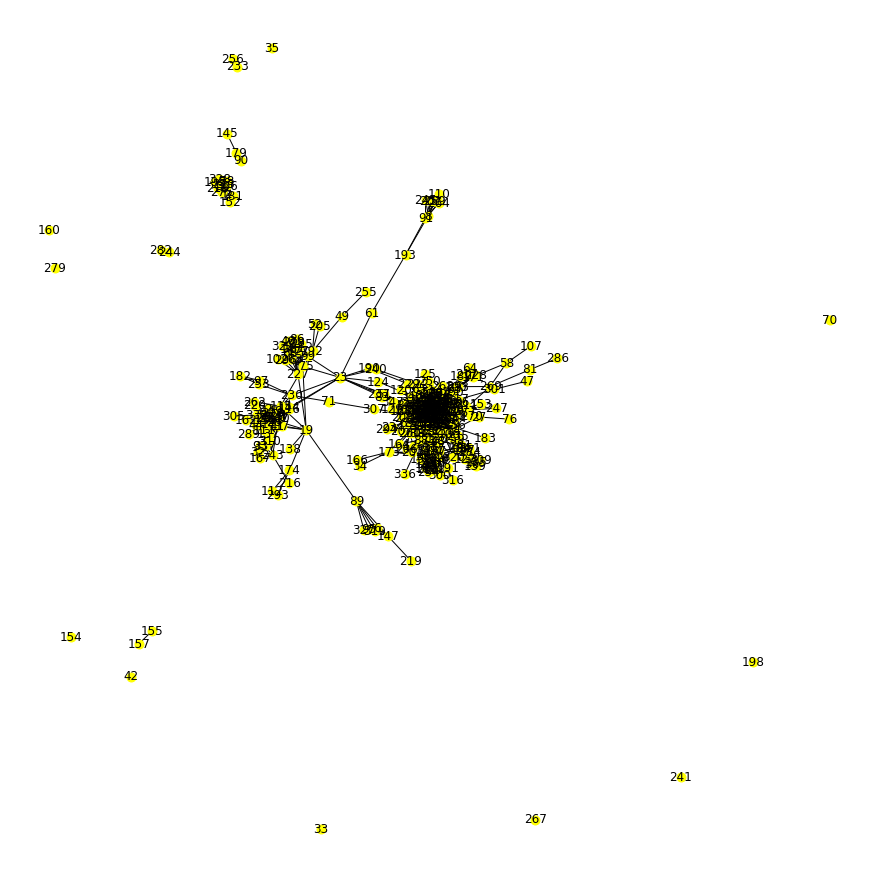

In [37]:
#build train graph

train_graph = nx.Graph()
train_graph.add_nodes_from(node_list)
print(len(edge_list), len(train_edge_list))
train_edge_list = random.sample(edge_list, math.ceil(0.8*len(edge_list)))
train_edge_list = [(i,j) for i,j in train_edge_list]
train_graph.add_edges_from(train_edge_list)

display_graph(train_graph)


In [38]:
# Buildind dataframe for train graph
#print(node_list)
train_df = pd.DataFrame(columns = ['source_node', 'dest_node', 'edge_exists', 'source_n2v', 'dest_n2v'])      


for i in range(len(train_edge_list)):      
    edge = train_edge_list[i]
    entry = [edge[0], edge[1], all_edges[edge], n2v[edge[0]], n2v[edge[1]]]
    train_df.loc[i] = entry

print(train_df.head)
        

<bound method NDFrame.head of      source_node dest_node edge_exists  \
0             13        59           1   
1             82       199           1   
2            313       238           1   
3            236         1           1   
4            339       291           1   
...          ...       ...         ...   
2011         185       148           1   
2012         285       315           1   
2013           9       334           1   
2014          72       132           1   
2015          56       265           1   

                                             source_n2v  \
0     [-0.020951226, 0.0036532604, 0.038371436, -0.0...   
1     [-0.027443347, 0.004496033, 0.042806156, -0.03...   
2     [-0.012364599, 0.0041572344, 0.027200526, -0.0...   
3     [-0.022831911, 0.0052677067, 0.036732677, -0.0...   
4     [-0.020488176, -0.007591067, 0.053442832, -0.0...   
...                                                 ...   
2011  [-0.026263122, -0.0102548, 0.026679162, -0.033

In [25]:
for i in range(len(train_df)):
    node1 = train_df['source_node'][i]
    node2 = train_df['dest_node'][i]
    train_df['edge_exists'][i] = all_edges[(str(node1), str(node2))]
    train_df['node1_n2v'][i] = n2v[node1]
    train_df['node2_n2v'][i] = n2v[node2]
    
print(len(node_list))
print(len(train_df))

KeyError: ('1', '119')